In [1]:
# %pip install datasets
# %pip install accelerate -U

# 文本分类

In [2]:
from transformers import BertForSequenceClassification
from transformers import BertTokenizer
import torch

In [3]:
# !source /etc/network_turbo

In [4]:
model_name = "IDEA-CCNL/Erlangshen-Roberta-110M-Sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)  # 预训练模型

In [5]:
texta = "鲸鱼是哺乳动物，所有哺乳动物都是恒温动物"
textb = "鲸鱼也是恒温动物"
output = model(torch.tensor([tokenizer.encode(texta, textb)]))
print(torch.nn.functional.softmax(output.logits, dim=-1))  # 测试一下

tensor([[0.0645, 0.9355]], grad_fn=<SoftmaxBackward0>)


准备数据集

In [6]:
from datasets import load_dataset, Features, Value

In [7]:
label_to_id = {  # 分类
    "升学": 0,
    "志愿": 1,
    "教务": 2,
    "思政": 3,
    "心理": 4,
    "灾害": 5,
    "作业与考试": 6,
    "竞赛与机会": 7,
    "企业参观与就业": 8,
    "生活": 9,
    "重要通知": 10,
    "垃圾与乐子": 11,
}

# 将label_to_id进行反转
id_to_label = {value: key for key, value in label_to_id.items()}
print(id_to_label)

{0: '升学', 1: '志愿', 2: '教务', 3: '思政', 4: '心理', 5: '灾害', 6: '作业与考试', 7: '竞赛与机会', 8: '企业参观与就业', 9: '生活', 10: '重要通知', 11: '垃圾与乐子'}


In [8]:
# 明确地定义CSV数据的特征描述
features = Features({"类别": Value("string"), "通知内容": Value("string")})

# 使用提供的特征描述加载数据集
dataset = load_dataset("csv", data_files="../data/combined_data.csv", features=features)

# 预览数据集
print(dataset)

Found cached dataset csv (/Users/wangfiox/.cache/huggingface/datasets/csv/default-84fa066c6a4d756c/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['类别', '通知内容'],
        num_rows: 307
    })
})


In [9]:
def preprocess_function(batch):
    # 对通知内容进行分词，并返回结果
    encoding = tokenizer(
        batch["通知内容"], truncation=True, padding="max_length", max_length=128
    )  # 分词，截断，填充
    encoding["labels"] = [
        label_to_id[label] for label in batch["类别"]
    ]  # 使用label_to_id将类别名转换为ID
    return encoding


# 使用map函数进行预处理
encoded_dataset = (
    dataset["train"]
    .map(preprocess_function, batched=True)
    .train_test_split(test_size=0.05)
)

train_dataset = encoded_dataset["train"]
test_dataset = encoded_dataset["test"]

Loading cached processed dataset at /Users/wangfiox/.cache/huggingface/datasets/csv/default-84fa066c6a4d756c/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1/cache-56da1c172dac4e4e.arrow


In [10]:
# 输出训练集和测试集的大小
print(len(train_dataset))
print(len(test_dataset))

# 打印第一个样本的内容，带换行符
print(train_dataset[0])
# 输出：
# {'类别': '生活', '通知内容': '各位同学@所有人 今天晚上收到多名同学反馈在教学楼、活动中心和宿舍楼附近发现卖笔的人员，请大家不要轻信和购买，保护好自身财产安全', 'input_ids': [101, 1392, 855, 1398, 2110, 137, 2792, 3300, 782, 791, 1921, 3241, 677, 3119, 1168, 1914, 1399, 1398, 2110, 1353, 7668, 1762, 3136, 2110, 3517, 510, 3833, 1220, 704, 2552, 1469, 2162, 5650, 3517, 7353, 6818, 1355, 4385, 1297, 5011, 4638, 782, 1447, 8024, 6435, 1920, 2157, 679, 6206, 6768, 928, 1469, 6579, 743, 8024, 924, 2844, 1962, 5632, 6716, 6568, 772, 2128, 1059, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'labels': 9}

291
16
{'类别': '生活', '通知内容': '【校园文化艺术系列展演（春季）活动预告】 请查收“美育新课堂·音梦更精彩”校园文化艺术系列展演（春季）活动预告，官网链接http://info.hitsz.edu.cn/content.jsp?urltype=news.NewsContentUrl&wbtreeid=1023&wbnewsid=3339[欢兔喝彩]', 'input_ids': [101, 523, 3413, 1736, 3152, 1265, 5686, 3318, 5143, 1154, 2245, 4028, 8020, 3217, 2108, 8021, 3833, 1220, 7564, 1440, 524, 6435, 3389, 3119, 100, 5401, 5509, 3173, 6440, 1828, 185, 7509, 3457, 3291, 5125, 2506, 100, 3413, 1736, 3152, 1265, 5686, 3318, 5143, 1154, 2245, 4028, 8020, 3217, 2108, 8021, 3833, 1220, 7564, 1440, 8024, 2135, 5381, 7216, 2970, 8184, 131, 120, 120, 9603, 119, 10295, 8118, 8253, 119, 9827, 119, 8274, 120, 9432, 119, 9016, 8187, 136, 8654, 11085, 134, 8501, 119, 8501, 10281, 11598, 10455, 9923, 111, 165, 10161, 11621, 8601, 134, 8667, 8152, 111, 165, 8204, 10040, 8601, 134, 10745, 8160, 138, 3614, 1052, 1600, 2506, 140, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

模型训练

In [11]:
# 修改模型输出
num_labels = len(label_to_id)
model = BertForSequenceClassification.from_pretrained(
    model_name, num_labels=num_labels, ignore_mismatched_sizes=True
)

# 打印模型的最后一层，验证是12分类
print(model.classifier)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at IDEA-CCNL/Erlangshen-Roberta-110M-Sentiment and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([12, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([12]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Linear(in_features=768, out_features=12, bias=True)


In [12]:
from transformers import Trainer, TrainingArguments

# 定义训练参数
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="steps",
    eval_steps=10,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=128,
    num_train_epochs=3,
    save_steps=50,
    logging_steps=20,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
)

# 创建Trainer对象
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=None,  # 如果你需要在验证时计算评估指标，请提供一个compute_metrics函数
)

In [13]:
# 开始训练
trainer.train()

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 1.880742073059082, 'eval_runtime': 0.1532, 'eval_samples_per_second': 104.453, 'eval_steps_per_second': 6.528, 'epoch': 2.0}
{'train_runtime': 20.2196, 'train_samples_per_second': 43.176, 'train_steps_per_second': 0.742, 'train_loss': 2.0486900329589846, 'epoch': 3.0}


TrainOutput(global_step=15, training_loss=2.0486900329589846, metrics={'train_runtime': 20.2196, 'train_samples_per_second': 43.176, 'train_steps_per_second': 0.742, 'train_loss': 2.0486900329589846, 'epoch': 3.0})

In [31]:
# 查看训练结果
trainer.log_metrics()

TypeError: log_metrics() missing 2 required positional arguments: 'split' and 'metrics'

In [29]:
trainer.evaluate()

  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 1.8100357055664062,
 'eval_runtime': 0.1782,
 'eval_samples_per_second': 89.777,
 'eval_steps_per_second': 5.611,
 'epoch': 3.0}

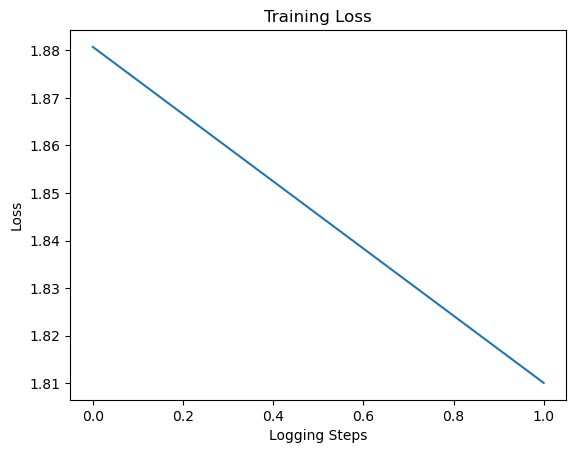

In [25]:
import matplotlib.pyplot as plt

# 获取训练的历史
history = trainer.state.log_history

# 提取损失值
loss_values = [entry["eval_loss"] for entry in history if "eval_loss" in entry]

# 绘制损失曲线
plt.plot(loss_values)
plt.title("Training Loss")
plt.xlabel("Logging Steps")
plt.ylabel("Loss")
plt.show()

In [14]:
# 按日期时间保存模型
from datetime import datetime

# 获取当前日期和时间
now = datetime.now()
timestamp = now.strftime("%Y%m%d_%H%M%S")

# 使用日期和时间作为模型的保存名
model_save_path = f"./model_{timestamp}"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to ./model_20231215_103751


## 评估模型

In [1]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

In [2]:
# 加载模型
model_save_path = "./model_20230915_145716"
model = BertForSequenceClassification.from_pretrained(model_save_path)
tokenizer = BertTokenizer.from_pretrained(model_save_path)

In [3]:
label_to_id = {
    "升学": 0,
    "志愿": 1,
    "教务": 2,
    "思政": 3,
    "心理": 4,
    "灾害": 5,
    "作业与考试": 6,
    "竞赛与机会": 7,
    "企业参观与就业": 8,
    "生活": 9,
    "重要通知": 10,
    "垃圾与乐子": 11,
}

# 将label_to_id进行反转
id_to_label = {value: key for key, value in label_to_id.items()}
print(id_to_label)

{0: '升学', 1: '志愿', 2: '教务', 3: '思政', 4: '心理', 5: '灾害', 6: '作业与考试', 7: '竞赛与机会', 8: '企业参观与就业', 9: '生活', 10: '重要通知', 11: '垃圾与乐子'}


In [4]:
def predict_label(text, model, tokenizer, id_to_label):
    # 对文本进行编码
    inputs = tokenizer(
        text, return_tensors="pt", truncation=True, padding="max_length", max_length=128
    )

    # 将输入移到模型所在的设备上
    inputs = {key: val.to(model.device) for key, val in inputs.items()}

    # 使用模型进行预测
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_label_id = logits.argmax(-1).item()

    # 获取预测的类别名
    predicted_label = id_to_label[predicted_label_id]

    return predicted_label

In [5]:
# 使用这个函数
text = "【第九届中国国际“互联网+”大学生创新创业大赛】 《教育部关于举办第九届中国国际“互联网+”大学生创新创业大赛的通知》已发（[https://mp.weixin.qq.com/s/0j9OTd3Iv4uyqNhW9e6MRA），鼓励同学们积极报名，筹备比赛项目，具体学院比赛报名截止时间待校区和省教育厅通知后另行发布，谢谢大家。](https://mp.weixin.qq.com/s/0j9OTd3Iv4uyqNhW9e6MRA），请大家把此通知转发给同学们，鼓励同学们积极报名，筹备比赛项目，具体学院比赛报名截止时间待校区和省教育厅通知后另行发布，谢谢大家。)（咱们学校很多课程项目都可以拿到省赛铜奖，请大家积极报名） 此比赛也请大家积极挖掘自己的大一立项、大创国创项目、课程项目等。积极报名@所有人"
predicted_label = predict_label(text, model, tokenizer, id_to_label)
print(f"The predicted label for the text is: {predicted_label}")

The predicted label for the text is: 竞赛与机会
